In [1]:
import sympy as sym
from colorama import Fore, Back, Style
import math
import numpy as np
import matplotlib.pyplot as plt

# Maximización para 3 inversionistas

In [2]:
#Utilidad.
def u(x,s):
    u_prime=x**(-1/s) #esta función no es u(x), sino la derivada de u(x) y por eso la nombré u_prime
    return u_prime


In [3]:
## Parámetros

#Probabilidades
p1 =.1
p2 =.1
p3 =.1

#precios 
sU = 12
#sM = 10
sD = 9

#Sigmas
sigma1=1.5
sigma2=2
sigma3=3

#proporción de las poblaciones
n1= 1/3
n2= 1/3
n3= 1/3

#Endowments
es1=1; ez1=0; #persona1
es2=1; ez2=0; #persona2
es3=1; ez3=0; #persona3


#Planteamiento de las incógnitas y ejecución del optimizador

#Declaración de incógnitas
sym.init_printing();
dz,dz2,dz3,ds,ds2,ds3,s0 = sym.symbols('dz,dz2,dz3,ds,ds2,ds3,s0',real=True);

#Dinámica Z
r = .1
z0 = 1/(1+r); 

#Dinámicas Cu
cu = sU * ds + dz;
cu2 = sU * ds2 + dz2;
cu3 = sU * ds3 + dz3;

#Dinámicas Cm
#cm = sM * ds + dz;
#cm2 = sM * ds2 + dz2;
#cm3 = sM * ds3 + dz3;

#Dinámicas Cd
cd = sD * ds + dz;
cd2 = sD * ds2 + dz2;
cd3 = sD * ds3 + dz3;

# 1. Equilibrio en el mercado de Bonos
a = sym.Eq((n1*dz + n2*dz2 + n3*dz3) - (n1 * ez1 + n2 * ez2 + n3 * ez3),0);

#2. Equilibrio en el mercado S
b = sym.Eq((n1*ds + n2*ds2 + n3*ds3) - (n1 * es1 + n2 * es2 + n3 * es3),0);

#3. Lucas(i) con sigma = 1.5
c = sym.Eq((z0 * (p1 * u(cu,sigma1) * sU + (1-p1) * u(cd, sigma1) * sD ) / (p1 * u(cu,sigma1) + (1-p1) * u(cd,sigma1)))-s0,0);

#4. Lucas(ii) con sigma = 2
d = sym.Eq((z0 * (p2 * u(cu2,sigma2) * sU + (1-p2) * u(cd2,sigma2) * sD ) / (p2 * u(cu2,sigma2) + (1-p2) * u(cd2,sigma2)))-s0,0);

#5. Lucas (iii) con sigma = 3
e = sym.Eq((z0 * (p3 * u(cu3,sigma3) * sU + (1-p3) * u(cd3,sigma3) * sD ) / (p3 * u(cu3,sigma3) + (1-p3) * u(cd3,sigma3)))-s0,0);

#6. Ingreso (i)
f = sym.Eq(s0 * ds + dz*z0 - s0*es1 - ez1*z0,0 );

#7. Ingreso (ii)
g = sym.Eq(s0 * ds2 + dz2 * z0 - s0*es2 - ez2*z0,0 );

#8. Ingreso (iii)
#h = sym.Eq(s0 * ds3 + dz3 * z0 - s0,0 );




#Optimizador
sols=sym.nsolve([a,b,c,d,e,f,g],(dz,dz2,dz3,ds,ds2,ds3,s0),[0,0,0,1,1,1,10.2273])


#Guardar las soluciones (deltas)

dz=round(sols[0],4);

dz2=round(sols[1],4);

dz3=round(sols[2],4);

ds=round(sols[3],4);

ds2=round(sols[4],4);

ds3=round(sols[5],4);

s0=round(sols[6],4);


#Gammas
gz=round((z0*dz)/(z0*dz+s0*ds+z0*dz2+s0*ds2+z0*dz3+s0*ds3),4)
gz2=round((z0*dz2)/(z0*dz+s0*ds+z0*dz2+s0*ds2+z0*dz3+s0*ds3),4)
gz3=round((z0*dz3)/(z0*dz+s0*ds+z0*dz2+s0*ds2+z0*dz3+s0*ds3),4)

gs=round((z0*ds)/(z0*dz+s0*ds+z0*dz2+s0*ds2+z0*dz3+s0*ds3),4)
gs2=round((z0*ds2)/(z0*dz+s0*ds+z0*dz2+s0*ds2+z0*dz3+s0*ds3),4)
gs3=round((z0*ds3)/(z0*dz+s0*ds+z0*dz2+s0*ds2+z0*dz3+s0*ds3),4)

#Dinámicas Cu
cu = sU * ds + dz;
cu2 = sU * ds2 + dz2;
cu3 = sU * ds3 + dz3;

#Dinámicas Cd
cd = sD * ds + dz;
cd2 = sD * ds2 + dz2;
cd3 = sD * ds3 + dz3;

#Probas neutrales al riesgo
Pu = round((s0*(1+r) - sD) / (sU -sD),4)
Pd = round(1 - Pu,4)

es1=[Pu/p1,Pd/(1-p1)];

es2=["up","down"];

cat=es2[es1.index(max(es1))]  
cat2=es2[es1.index(min(es1))] 
#Impresión de los resultados
sigmas=[1.5,2,3]
vec = ["z","z2","z3","s","s2","s3"]
deltas =[dz,dz2,dz3,ds,ds2,ds3]
gammas = [gz,gz2,gz3,gs,gs2,gs3]
riquezas = [cu,cu2,cu3,cd,cd2,cd3]

print("El precio de"+Style.BRIGHT+Fore.RED+Style.BRIGHT+" s0 "+Fore.BLACK+Style.BRIGHT+"es $"+str(s0)+Style.RESET_ALL)
print("La "+Fore.RED+Style.BRIGHT+" Pu "+Fore.BLACK+Style.RESET_ALL+"es "+Style.BRIGHT+str(Pu*100)+"%"+Style.RESET_ALL)
print("La "+Fore.RED+Style.BRIGHT+" Pd"+Fore.BLACK+Style.RESET_ALL+"es "+Style.BRIGHT+str(Pd*100)+"%"+Style.RESET_ALL)
print("El evento "+Style.BRIGHT+Style.BRIGHT+" catastrófico para 1 "+Style.RESET_ALL+"es el evento "+Style.BRIGHT+Fore.RED+str(cat)+Style.RESET_ALL)
print("El evento "+Style.BRIGHT+Style.BRIGHT+" catastrófico para 2 "+Style.RESET_ALL+"es el evento "+Style.BRIGHT+Fore.RED+str(cat2)+Style.RESET_ALL)
for i in range(3):
    print("\n")
    print("Para el"+Fore.RED+Style.BRIGHT+ " inversionista "+Style.BRIGHT+ str(i+1)+Style.RESET_ALL+" con \u03C3 = "+Fore.BLUE+Style.BRIGHT+str(sigmas[i])+Style.RESET_ALL)
    print("\n")
    print("     \u03B4 "+str(vec[i])+ " es "+Style.BRIGHT+str(deltas[i])+Style.RESET_ALL)
    print("     \u03B4 "+str(vec[i+3])+ " es "+Style.BRIGHT+str(deltas[i+3])+Style.RESET_ALL)
    print("\n")
    print("     \u03B3 "+str(vec[i])+" es "+Style.BRIGHT+str(gammas[i])+Style.RESET_ALL)
    print("     \u03B3 "+str(vec[i+3])+" es "+Style.BRIGHT+str(gammas[i+3])+Style.RESET_ALL)
    print("\n")
    print("Sus"+Style.BRIGHT+" riquezas posibles "+Style.RESET_ALL+"(Cu o Cd) son:")
    print("\n")
    print("     si Cu "+str(i+1)+": "+Style.BRIGHT+str(riquezas[i])+Style.RESET_ALL)
    print("     si Cd "+str(i+1)+": "+Style.BRIGHT+str(riquezas[i+3])+Style.RESET_ALL)

print("\n")
print("\n")


El precio de s0 es $8.4239
La  Pu es 8.88%
La  Pdes 91.1%
El evento  catastrófico para 1 es el evento down
El evento  catastrófico para 2 es el evento up


Para el inversionista 1 con σ = 1.5


     δ z es 3.1402
     δ s es 0.6611


     γ z es 0.1130
     γ s es 0.0238


Sus riquezas posibles (Cu o Cd) son:


     si Cu 1: 11.073
     si Cd 1: 9.0901


Para el inversionista 2 con σ = 2


     δ z2 es 0.8749
     δ s2 es 0.9056


     γ z2 es 0.0315
     γ s2 es 0.0326


Sus riquezas posibles (Cu o Cd) son:


     si Cu 2: 11.74
     si Cd 2: 9.025


Para el inversionista 3 con σ = 3


     δ z3 es -4.0151
     δ s3 es 1.4333


     γ z3 es -0.1444
     γ s3 es 0.0516


Sus riquezas posibles (Cu o Cd) son:


     si Cu 3: 13.184
     si Cd 3: 8.8846






## Maximización para 2 inversionistas

In [4]:
## Parámetros

#Probabilidades
p1 = .2
p2 = p1 - 0.1

#precios 
sU = 12
sD = 9

#Sigmas
sigma1=1.5
sigma2=3

#proporción de las poblaciones
n1= 1/2
n2= 1 - n1

#Endowments
es1=1; ez1=0;
es2=1; ez2=0;


   
#Declaración de incógnitas
sym.init_printing();
dz,dz2,ds,ds2,s0 = sym.symbols('dz,dz2,ds,ds2,s0',real=True);

#Dinámica Z
r = .1
z0 = 1/(1+r); 

#Dinámicas Cu
cu = sU * ds + dz;
cu2 = sU * ds2 + dz2;

#Dinámicas Cd
cd = sD * ds + dz;
cd2 = sD * ds2 + dz2;


#1. Equilibrio en el mercado de Bonos
a = sym.Eq((n1*dz + n2*dz2) - (n1 * ez1 + n2 * ez2),0);

#2. Equilibrio en el mercado S
b = sym.Eq((n1*ds + n2*ds2) - (n1 * es1 + n2 * es2),0);

#3. Lucas(i) con sigma = 1.5
c = sym.Eq((z0 * (p1 * u(cu,sigma1) * sU + (1-p1) * u(cd, sigma1) * sD ) / (p1 * u(cu,sigma1) + (1-p1) * u(cd,sigma1)))-s0,0);

#4. Lucas(ii) con sigma = 3
d = sym.Eq((z0 * (p2 * u(cu2,sigma2) * sU + (1-p2) * u(cd2,sigma2) * sD ) / (p2 * u(cu2,sigma2) + (1-p2) * u(cd2,sigma2)))-s0,0);

#5. Ingreso (i)
e = sym.Eq(s0 * ds + dz*z0 - s0*es1 - ez1*z0,0 );

#6. Ingreso (ii)
#f = sym.Eq(s0 * ds2 + dz2 * z0 - s0*es2 - ez2*z0,0 );

#Optimizador
sols=sym.nsolve([a,b,c,d,e],(dz,dz2,ds,ds2,s0),[0,0,1,1,8.5175])


#Guardar las soluciones (deltas)

dz=round(sols[0],4);

dz2=round(sols[1],4);

ds=round(sols[2],4);

ds2=round(sols[3],4);

s0=round(sols[4],4);



#Dinámicas Cu# Plot cu, cu2, cd, cd2 as functions of p
cu = round(sU * ds + dz,3);
cu2 = round(sU * ds2 + dz2,3);

#Dinámicas Cd
cd = round(sD * ds + dz,3);
cd2 = round(sD * ds2 + dz2,3);
    
#Probas neutrales al riesgo
Pu = round((s0*(1+r) - sD) / (sU -sD),4)
Pd = round(1 - Pu,4)
    
#Eventos
es1=[Pu/p1,Pd/(1-p1)];
es2=["up","down"];

cat=es2[es1.index(max(es1))]  
cat2=es2[es1.index(min(es1))] 
    
sigmas=[1.5,3]
vec = ["z","z2","s","s2"]
deltas =[dz,dz2,ds,ds2]
riquezas = [cu,cu2,cd,cd2]  

print("El precio de"+Style.BRIGHT+Fore.RED+Style.BRIGHT+" s0 "+Fore.BLACK+Style.BRIGHT+"es $"+str(s0)+Style.RESET_ALL)
print("La "+Fore.RED+Style.BRIGHT+" Pu "+Fore.BLACK+Style.RESET_ALL+"es "+Style.BRIGHT+str(Pu*100)+"%"+Style.RESET_ALL)
print("La "+Fore.RED+Style.BRIGHT+" Pd "+Fore.BLACK+Style.RESET_ALL+"es "+Style.BRIGHT+str(Pd*100)+"%"+Style.RESET_ALL)
print("El evento "+Style.BRIGHT+Style.BRIGHT+" catastrófico para 1 "+Style.RESET_ALL+"es el evento "+Style.BRIGHT+Fore.RED+str(cat)+Style.RESET_ALL)
print("El evento "+Style.BRIGHT+Style.BRIGHT+" catastrófico para 2 "+Style.RESET_ALL+"es el evento "+Style.BRIGHT+Fore.RED+str(cat2)+Style.RESET_ALL)
for i in range(2):
    print("\n")
    print("Para el"+Fore.RED+Style.BRIGHT+ " inversionista "+Style.BRIGHT+ str(i+1)+Style.RESET_ALL+" con \u03C3 = "+Fore.BLUE+Style.BRIGHT+str(sigmas[i])+Style.RESET_ALL)
    print("\n")
    print("     \u03B4 "+str(vec[i])+ " es "+Style.BRIGHT+str(deltas[i])+Style.RESET_ALL)
    print("     \u03B4 "+str(vec[i+2])+ " es "+Style.BRIGHT+str(deltas[i+2])+Style.RESET_ALL)
    print("\n")
    print("Sus"+Style.BRIGHT+" riquezas posibles "+Style.RESET_ALL+"(Cu o Cd) son:")
    print("\n")
    print("     si Cu "+str(i+1)+": "+Style.BRIGHT+str(riquezas[i])+Style.RESET_ALL)
    print("     si Cd "+str(i+1)+": "+Style.BRIGHT+str(riquezas[i+2])+Style.RESET_ALL)

print("\n")
print("\n")

    

El precio de s0 es $8.5175
La  Pu es 12.31%
La  Pd es 87.69%
El evento  catastrófico para 1 es el evento down
El evento  catastrófico para 2 es el evento up


Para el inversionista 1 con σ = 1.5


     δ z es -25.0882
     δ s es 3.6777


Sus riquezas posibles (Cu o Cd) son:


     si Cu 1: 19.044
     si Cd 1: 8.011


Para el inversionista 2 con σ = 3


     δ z2 es 25.0882
     δ s2 es -1.6777


Sus riquezas posibles (Cu o Cd) son:


     si Cu 2: 4.956
     si Cd 2: 9.989






# Plotting

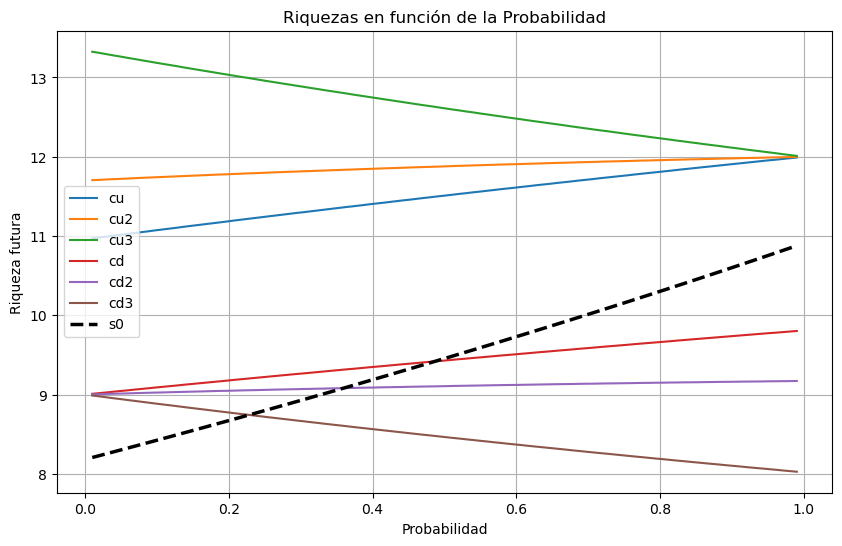

In [6]:
# Parámetros

## Parámetros

#Probabilidades
plist = np.linspace(.01, .99, 101)

#Sigma
sigma1=1.5
sigma2=2
sigma3=3
#proporciones
n1= 1/3
n2= 1/3
n3= 1/3
#Endowments
es1=1; ez1=0;
es2=1; ez2=0;
es3=1; ez3=0;

# Lists to store the results
cu_values = []
cu2_values = []
cu3_values = []
cd_values = []
cd2_values = []
cd3_values = []
s0_values = []

# Listas deltas
dz_values = [] ; ds_values = []
dz2_values = [] ; ds2_values = []
dz3_values = [] ; ds3_values = []

#Planteamiento de las incógnitas y ejecución del optimizador
for p in plist:
    
    #Declaración de incógnitas
    sym.init_printing();
    dz,dz2,dz3,ds,ds2,ds3,s0 = sym.symbols('dz,dz2,dz3,ds,ds2,ds3,s0',real=True);

    #Dinámica Z
    r = .1
    z0 = 1/(1+r); 

    #Dinámicas Cu
    cu = 12 * ds + dz;
    cu2 = 12 * ds2 + dz2;
    cu3 = 12 * ds3 + dz3;

    #Dinámicas Cd
    cd = 9 * ds + dz;
    cd2 = 9 * ds2 + dz2;
    cd3 = 9 * ds3 + dz3;

    # 1. Equilibrio en el mercado de Bonos
    a = sym.Eq((n1*dz + n2*dz2 + n3*dz3) - (n1 * ez1 + n2 * ez2 + n3 * ez3),0);

    #2. Equilibrio en el mercado S
    b = sym.Eq((n1*ds + n2*ds2 + n3*ds3) - (n1 * es1 + n2 * es2 + n3 * es3),0);

    #3. Lucas(i) con sigma = 1.5
    c = sym.Eq((z0 * (p * u(cu,sigma1) * 12 + (1-p) * u(cd, sigma1) * 9 ) / (p * u(cu,sigma1) + (1-p) * u(cd,sigma1)))-s0,0);

    #4. Lucas(ii) con sigma = 2
    d = sym.Eq((z0 * (p * u(cu2,sigma2) * 12 + (1-p) * u(cd2,sigma2) * 9 ) / (p * u(cu2,sigma2) + (1-p) * u(cd2,sigma2)))-s0,0);

    #5. Lucas (iii) con sigma = 3
    e = sym.Eq((z0 * (p * u(cu3,sigma3) * 12 + (1-p) * u(cd3,sigma3) * 9 ) / (p * u(cu3,sigma3) + (1-p) * u(cd3,sigma3)))-s0,0);

    #6. Ingreso (i)
    f = sym.Eq(s0 * ds + dz*z0 - s0*es1 - ez1*z0,0 );

    #7. Ingreso (ii)
    g = sym.Eq(s0 * ds2 + dz2 * z0 - s0*es2 - ez2*z0,0 );

    #8. Ingreso (iii)
    #h = sym.Eq(s0 * ds3 + dz3 * z0 - s0,0 );




    #Optimizador
    sols=sym.nsolve([a,b,c,d,e,f,g],(dz,dz2,dz3,ds,ds2,ds3,s0),[0,0,0,1,1,1,10.2273])


    #Guardar las soluciones (deltas)

    dz=round(sols[0],4);

    dz2=round(sols[1],4);

    dz3=round(sols[2],4);

    ds=round(sols[3],4);

    ds2=round(sols[4],4);

    ds3=round(sols[5],4);

    s0=round(sols[6],4);


    #Dinámicas Cu
    cu = 12 * ds + dz;
    cu2 = 12 * ds2 + dz2;
    cu3 = 12 * ds3 + dz3;

    #Dinámicas Cd
    cd = 9 * ds + dz;
    cd2 = 9 * ds2 + dz2;
    cd3 = 9 * ds3 + dz3;
    
    # Valores de cu, cu2, cu3, cd, cd2, and cd3
    cu_values.append(cu)
    cu2_values.append(cu2)
    cu3_values.append(cu3)
    cd_values.append(cd)
    cd2_values.append(cd2)
    cd3_values.append(cd3)
    s0_values.append(s0)
    
    # Valores deltas
    dz_values.append(dz); 
    ds_values.append(ds);
    dz2_values.append(dz2); 
    ds2_values.append(ds2);
    dz3_values.append(dz3); 
    ds3_values.append(ds3)
#Plotting

# Plot cu, cu2, cu3, cd, cd2, and cd3 as functions of p
plt.figure(figsize=(10, 6))
plt.plot(plist, cu_values, label='cu')
plt.plot(plist, cu2_values, label='cu2')
plt.plot(plist, cu3_values, label='cu3')
plt.plot(plist, cd_values, label='cd')
plt.plot(plist, cd2_values, label='cd2')
plt.plot(plist, cd3_values, label='cd3')
plt.plot(plist, s0_values, label='s0',color = "black",linestyle='--',linewidth=2.5)
plt.xlabel('Probabilidad')
plt.ylabel('Riqueza futura')
plt.legend()
plt.title('Riquezas en función de la Probabilidad')
plt.grid(True)
plt.show()


